I have the clean data from the previous step that includes: <br>
- DATE: in datetime format <br>
- PRCP: water equivalent (in) or precipitation (if all the snow was melted down to water) <br>
- SNOW: new snow measured in inches <br>
- SNWD: snow depth measured in inches <br>
- TMAX: max temperature observed on that day <br>
- TMIN: min temperature observed on that day <br>
- TOBS: official observed tempterature observed on that day <br>
- MONTH: month separated from Date to make groupby easier <br>
- DAY: day separated from Date to make groupby easier <br>
- PDO: pacific decadal oscillation; data given by the month but interpolated to the day <br>
- AMO: atlantic decadal oscillation; data measure by the month but interpolated to the day <br>

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pickle
path="C:\Springboard\Github\Capstone1_alta\intermediate_data"
os.chdir(path)

In [6]:
ALTA = pickle.load(open("alta_snow_clean2.pkl", "rb"))
ALTA.head()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY,PDO,AMO
0,1944-11-21,0.00,0.0,20.0,52.0,9.0,20.0,11,21,0.2,0.272
1,1944-11-22,0.00,0.0,19.0,48.0,19.0,29.0,11,22,0.2,0.272
2,1944-11-23,0.00,0.0,19.0,56.0,24.0,40.0,11,23,0.2,0.272
3,1944-11-24,0.82,6.0,25.0,52.0,14.0,16.0,11,24,0.2,0.272
4,1944-11-25,0.06,11.0,36.0,26.0,11.0,14.0,11,25,0.2,0.272


This data looks just like how I left it; now, let's see if I can gather some stats on the different values

In [7]:
ALTA.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,PDO,AMO
count,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21200.000000,21808.000000
mean,0.154552,1.501756,39.350956,46.094742,27.220721,36.997859,0.009221,0.003105
std,0.357696,3.661164,41.374939,17.692602,15.550385,18.270581,1.090899,0.216529
min,0.000000,0.000000,0.000000,-8.000000,-26.000000,-18.000000,-3.600000,-0.527000
25%,0.000000,0.000000,0.000000,32.000000,16.000000,23.000000,-0.783903,-0.152215
50%,0.000000,0.000000,26.000000,44.000000,26.000000,34.000000,0.050000,0.010298
75%,0.120000,0.500000,74.000000,62.000000,40.000000,51.000000,0.752903,0.158827
max,5.000000,38.000000,179.000000,113.000000,77.000000,84.000000,3.510000,0.519000


These values look good, but there are a few things that stand out to me: <br>
Snowfall max - 38in in a 24hrs is a lot, but it's very possible at Alta; since I focus on predicting this catagory, I need to leave this in <br>
Tmax - this max value of 113 seems extremely high for the town of Alta. I will need to plot this to see how it looks on a scatter. My instinct says this is a measurement error. <br>
All of the other values seem good.

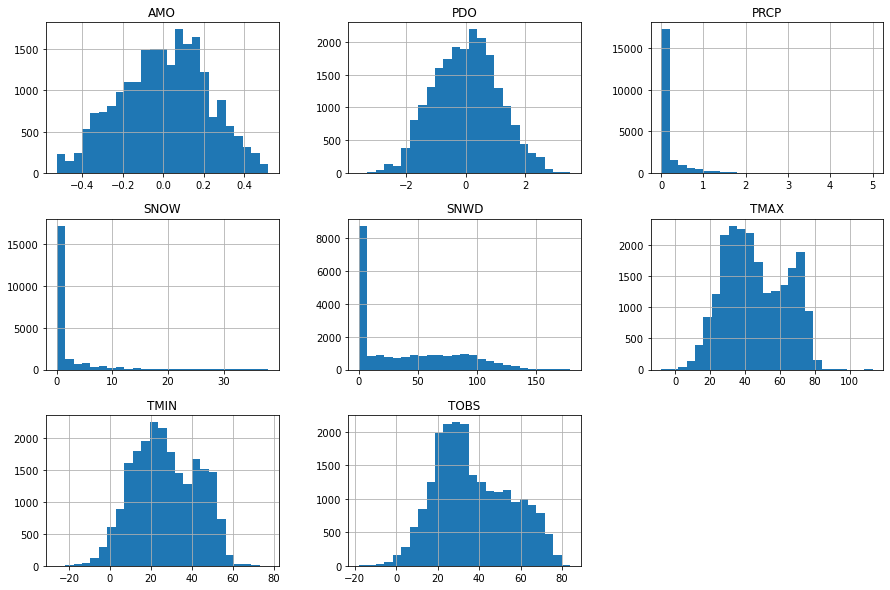

In [8]:
hist = ALTA.hist(bins=25, figsize=(15,10))

This does include summertime data, so there will be a lot of 0's for snowfall and snow depth. Even for winter, I expect a lot of days of 0 snowfall with some deep days in there. <br>
Snowfall (our variable of interest) looks like it has an exponential distribution. <br> 
Let's also compute a rolling sum of the snowfall to see if that brings about a better distribution; we will do that for both 14 and 7 days.

In [40]:
ALTA["SNOW7"] = ALTA.rolling(window=7)['SNOW'].sum()
ALTA["SNOW14"] = ALTA.rolling(window=14)['SNOW'].sum()
# a 30-day index would also be good to plot versus PDO and AMO, since those change more long-term
ALTA["SNOW30"] = ALTA.rolling(window=30)['SNOW'].sum()

In [41]:
ALTA.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,PDO,AMO,SNOW7,SNOW4,SNOW30,SNOW14
count,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21200.000000,21808.000000,2.180300e+04,2.180600e+04,2.178000e+04,2.179600e+04
mean,0.154552,1.501756,39.350956,46.094742,27.220721,36.997859,0.009221,0.003105,1.051335e+01,6.007851e+00,4.508577e+01,2.102880e+01
std,0.357696,3.661164,41.374939,17.692602,15.550385,18.270581,1.090899,0.216529,1.425929e+01,9.664500e+00,4.231070e+01,2.345198e+01
min,0.000000,0.000000,0.000000,-8.000000,-26.000000,-18.000000,-3.600000,-0.527000,-4.440892e-14,-1.243450e-14,-2.016165e-13,-7.105427e-14
25%,0.000000,0.000000,0.000000,32.000000,16.000000,23.000000,-0.783903,-0.152215,-2.037259e-14,0.000000e+00,2.500000e+00,-1.265654e-14
50%,0.000000,0.000000,26.000000,44.000000,26.000000,34.000000,0.050000,0.010298,4.000000e+00,1.776357e-14,3.920000e+01,1.400000e+01
75%,0.120000,0.500000,74.000000,62.000000,40.000000,51.000000,0.752903,0.158827,1.700000e+01,9.000000e+00,7.300000e+01,3.450000e+01
max,5.000000,38.000000,179.000000,113.000000,77.000000,84.000000,3.510000,0.519000,9.900000e+01,8.500000e+01,2.675000e+02,1.540000e+02


This has me so stoked to see the median of 4 inches for 7-day sum. That includes summer! <br>
Let's separate winter and look at the histograms again.

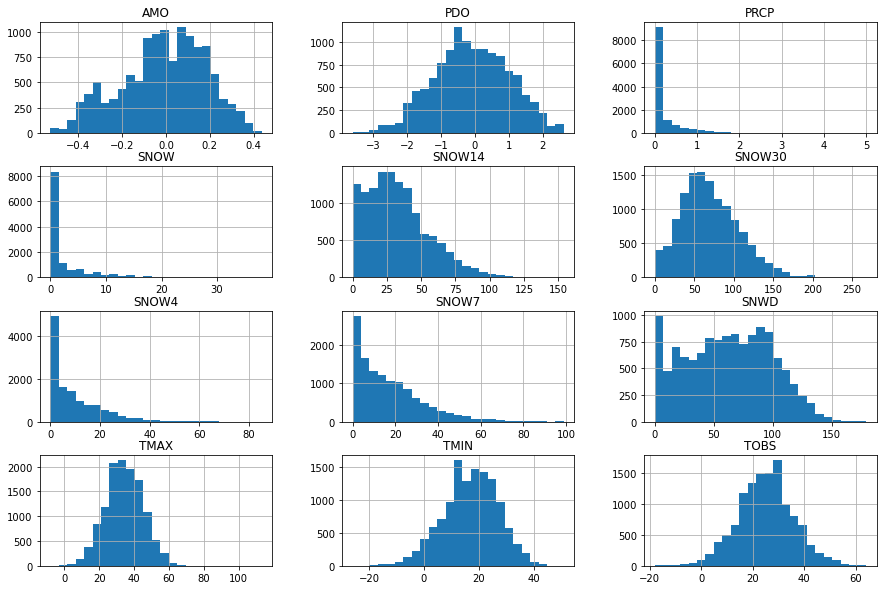

In [42]:
win = ALTA[ALTA.MONTH.isin(['11','12','01','02','03','04'])]
win.tail()
hist = win.hist(bins=25, figsize=(15,10))

In [43]:
win_d = win.groupby(['MONTH','DAY']).mean()

In [44]:
win_d.head()

PRCP      SNOW       SNWD       TMAX       TMIN       TOBS  \
MONTH DAY                                                                   
01    01   0.163836  2.161644  54.890411  28.860108  10.942300  19.413450   
      02   0.250000  3.121918  55.876712  29.277778  11.430556  18.378788   
      03   0.172877  2.175342  55.671233  28.992295  10.841610  18.665668   
      04   0.086849  1.608219  54.315068  28.997302  11.871316  18.742632   
      05   0.213944  2.633803  55.971831  29.694762  11.117077  19.445863   

                PDO       AMO      SNOW7     SNOW4     SNOW30     SNOW14  
MONTH DAY                                                                 
01    01  -0.185379 -0.016918  16.894521  9.034247  74.583562  35.610959  
      02  -0.184516 -0.017774  16.830137  9.821918  75.595890  36.554795  
      03  -0.183653 -0.018630  16.565753  9.573973  75.363014  36.535616  
      04  -0.182790 -0.019486  15.939726  9.067123  74.824658  35.443836  
      05  -0.177798 -0.020946  16.178873  9.557746  74.535211  34.160563

This is very cool to see. Can we plot it?

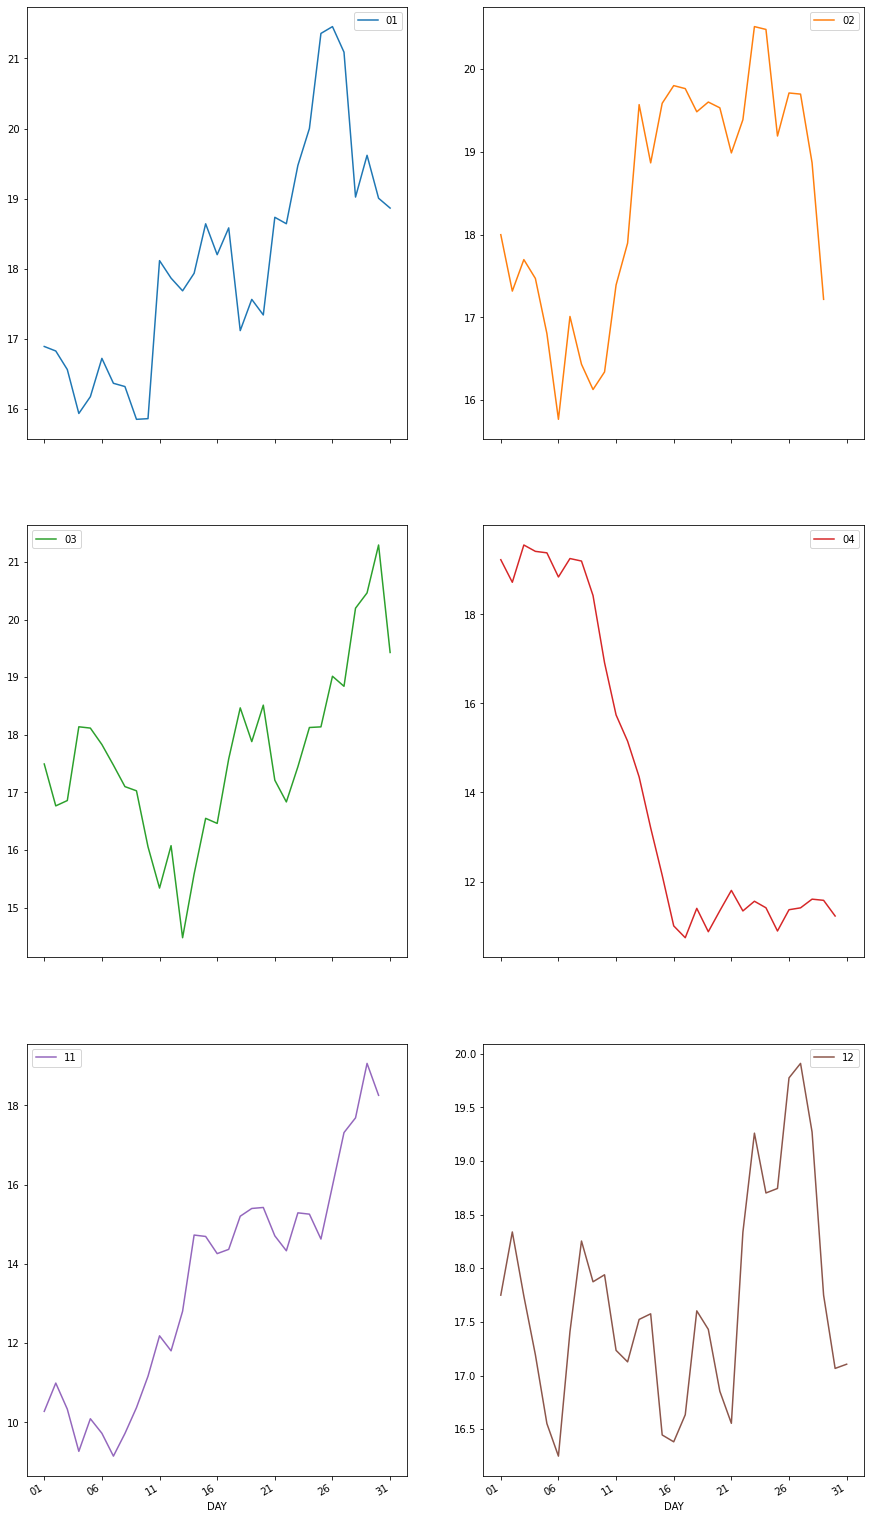

In [47]:
# plot for 7 day snowfall
# https://www.quantopian.com/posts/plotting-multi-index-pandas-dataframe
win_d.SNOW7.unstack(level=0).plot(subplots=True, figsize=(15, 30), layout=(3, 2));

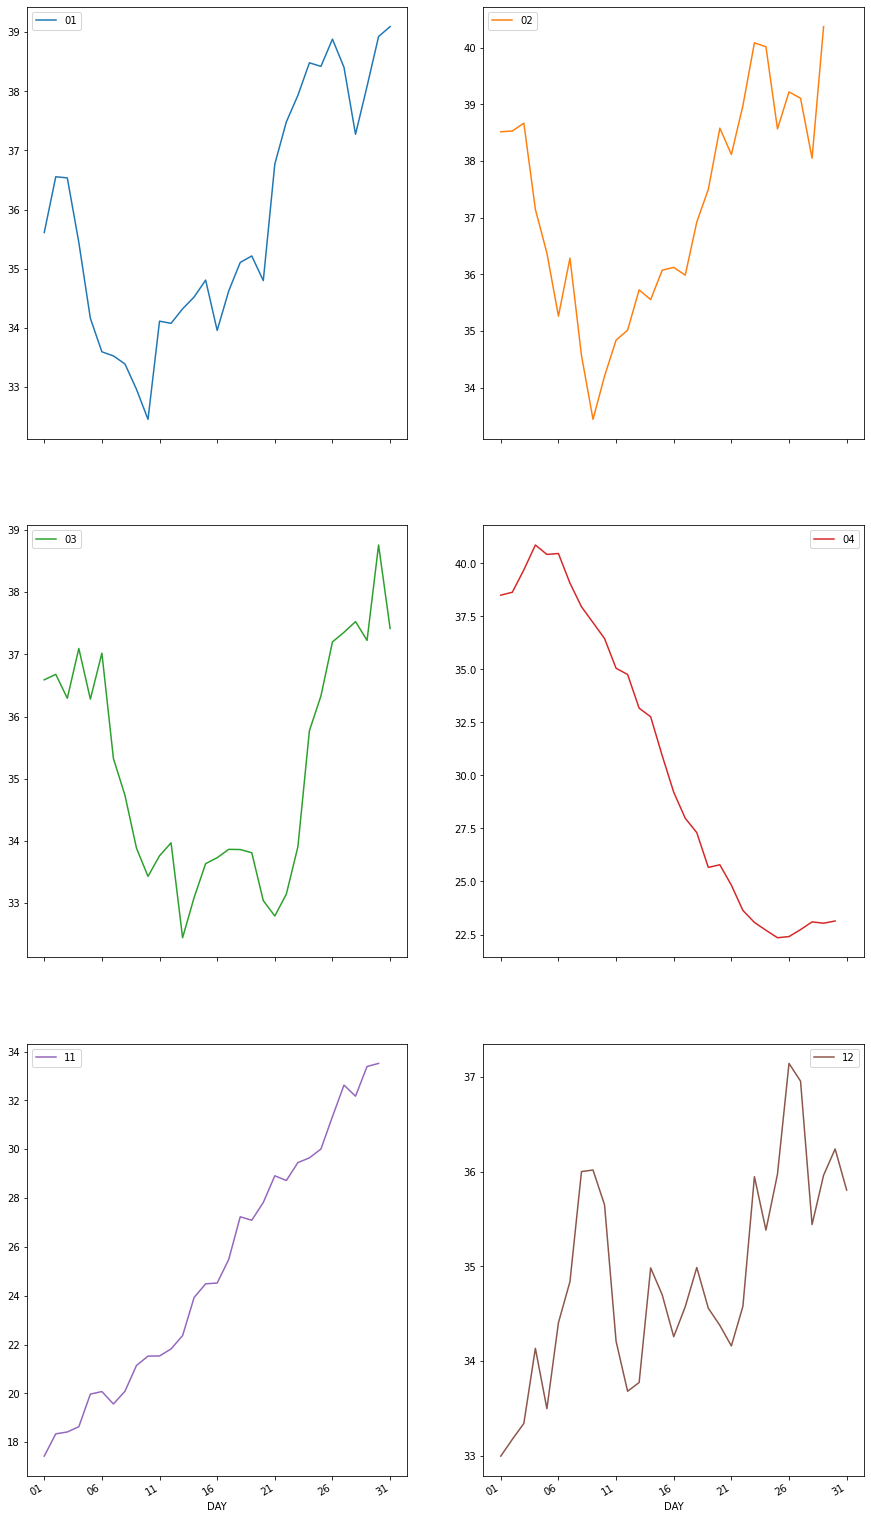

In [45]:
# those were OK, but I would really like to see the season in one continuous stretch; let's looks at longer stretches
# 14 day snowfall
win_d.SNOW14.unstack(level=0).plot(subplots=True, figsize=(15, 30), layout=(3, 2));

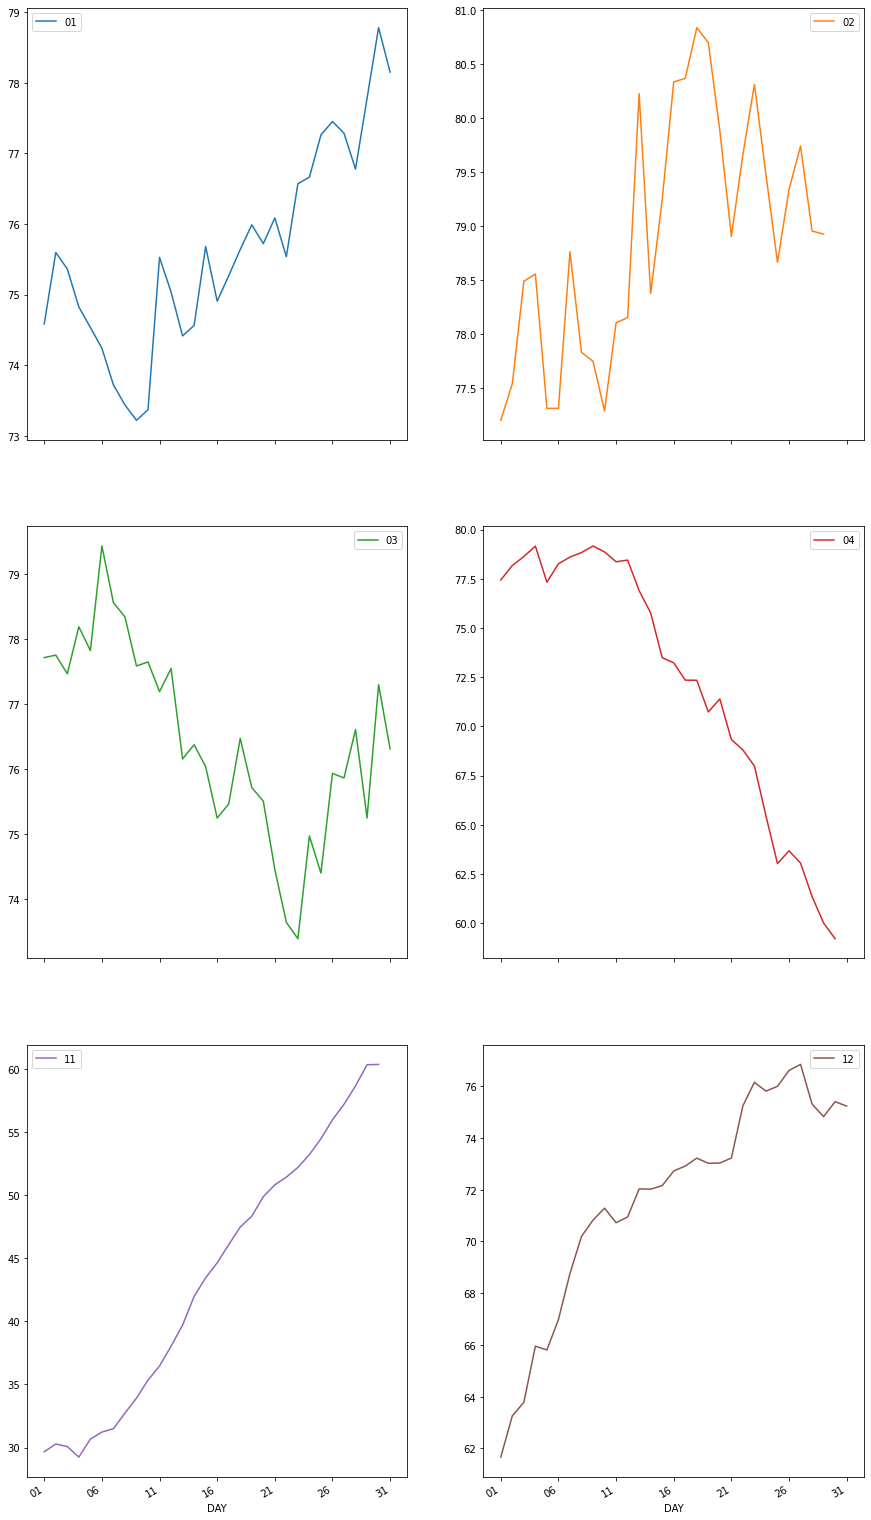

In [46]:
# those were OK, but I would really like to see the season in one continuous stretch; let's try to resort
#plt.plot(x=win_d['MONTH','DAY'], y=win_d['SNOW7']) layout=(10, 2)
# https://www.quantopian.com/posts/plotting-multi-index-pandas-dataframe
win_d.SNOW30.unstack(level=0).plot(subplots=True, figsize=(15, 30), layout=(3, 2));